<a href="https://colab.research.google.com/github/eddieward21/resnet50-transfer-learning/blob/main/resnet_50_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os, re, time, json
from PIL import Image, ImageFont, ImageDraw
import numpy as np
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

print("Tensorflow version " + tf.__version__)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version 2.14.0


In [4]:
BATCH_SIZE = 32
classes = ['airplane', 'automobile', 'deer', 'dog', 'sheep', 'horse','truck', 'bird', 'cat']

plt.rc("image", cmap = 'gray')
plt.rc('grid', linewidth = 0)
plt.rc('xtick', top = False, bottom = False, labelsize = 'large')
plt.rc('ytick', left = False, right = False, labelsize = 'large')
plt.rc('axes', facecolor = 'F8F8F8', titlesize ="large", edgecolor = "white")
plt.rc('text', color = "a8151a")
plt.rc("figure", facecolor = "F0F0F0")
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

def display_images(digits, predictions, labels, title):
  n = 10
  indexes= np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]

  fig = plt.figure(figsize = (20,4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1)
    class_index = n_predictions[i]

    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])


def plot_metrics(metric_name, title, ylim = 5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color = 'blue', label =metric_name)
  plt.plot(history.history['val_' + metric_name], color= 'green', label = "val_" + metric_name)





In [5]:
(training_images, training_labels), (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


IndexError: ignored

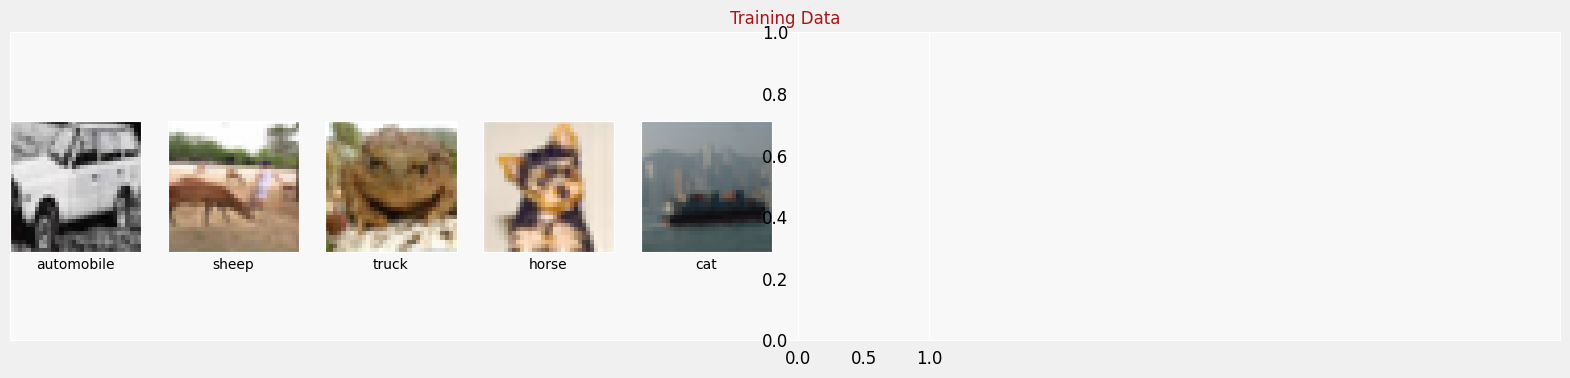

In [6]:
display_images(training_images, training_labels, training_labels, "Training Data")


In [ ]:
display_images(validation_images, validation_labels, validation_labels, "Training_Data")

In [ ]:
validation_images[0].astype('float32').shape

In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.renet50.preprocess_input(input_images)
  return output_ims

In [ ]:
train_X = preprocess_image_input(training_images)
valid_X = preprocess_image_input(validation_images)


In [ ]:
def feature_extractor(inputs):
  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape = (224,224,3), include_top = False, weights = "imagenet")(inputs)
  return feature_extractor

def classifier(inputs):
  x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
  x = tf.keras.layers.flatten()(x)
  x = tf.keras.layers.Dense(1024, activation = "relu")(x)
  x = tf.keras.layers.Dense(512, activation = "relu")(x)
  x = tf.keras.layers.Dense(10, activation = "softmax", name = "classification")(x)

def final_model(inputs):
  resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
  resnet_feature_extractor = feature_extractor(resize)
  classification_output = classifier(resnet_feature_extractor)
  return classification_output

def define_compile_model():
  inputs = tf.keras.layers.Input(shape = (32,32,3))
  classification_output = final_model(inputs)
  model = tf.Keras.Model(inputs = inputs, outputs = classification_output)
  model.compile(optimizer = "SGD", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

model = define_compile_model()
model.summary()
